In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:

# 1. Load dataset
df = pd.read_csv('house_prediction_cleaned.csv')

In [16]:
from tensorflow import keras
from tensorflow.keras import layers


In [7]:
print("Dataset shape:", data.shape)
print("Columns:", data.columns)

Dataset shape: (284, 7)
Columns: Index(['LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'GarageCars', 'SalePrice'],
      dtype='object')


In [11]:
# Features and target
X = df[['LotArea','OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','GarageCars']]
y = df['SalePrice']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scaling (important for ANN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:

# Build ANN
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # regression output
])

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [19]:
# Train
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 63781715968.0000 - mae: 245751.1094 - val_loss: 57837662208.0000 - val_mae: 232071.1250
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 63781507072.0000 - mae: 245750.7031 - val_loss: 57837445120.0000 - val_mae: 232070.6562
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 63781285888.0000 - mae: 245750.2812 - val_loss: 57837228032.0000 - val_mae: 232070.1719
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 63781060608.0000 - mae: 245749.8125 - val_loss: 57836986368.0000 - val_mae: 232069.6094
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 63780810752.0000 - mae: 245749.2812 - val_loss: 57836695552.0000 - val_mae: 232068.9844
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 63780511744.0000 - mae: 245748.6562 - val_loss: 57836359680.0000 - val_mae: 232068.2188
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 63780139008.0000 - mae: 245747.8906 - val_loss: 57835941888

In [20]:
# Evaluate
loss, mae = model.evaluate(X_test_scaled, y_test)
print("Test MAE:", mae)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 59242758144.0000 - mae: 234661.8594
Test MAE: 234661.859375


In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error
lr_mae = mean_absolute_error(y_test, lr_pred)
print("Linear Regression MAE:", lr_mae)


Linear Regression MAE: 21605.99437358494


In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
print("Random Forest MAE:", rf_mae)


Random Forest MAE: 13162.317251461987


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 59242758144.0000 - mae: 234661.8594
ANN MAE: 234661.859375


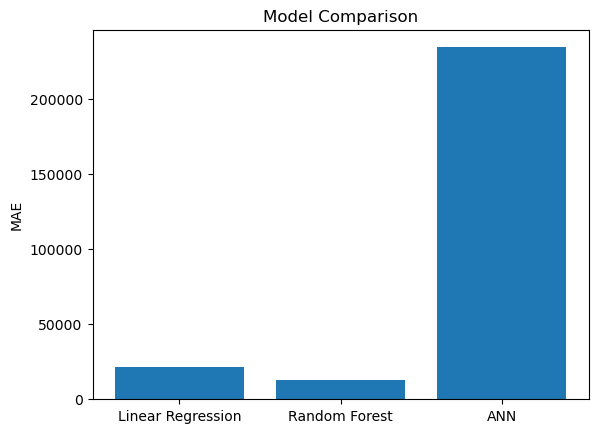

In [24]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'ANN']
ann_loss, ann_mae = model.evaluate(X_test_scaled, y_test)
print("ANN MAE:", ann_mae)

mae_values = [lr_mae, rf_mae, ann_mae]

plt.bar(models, mae_values)
plt.ylabel("MAE")
plt.title("Model Comparison")
plt.show()
